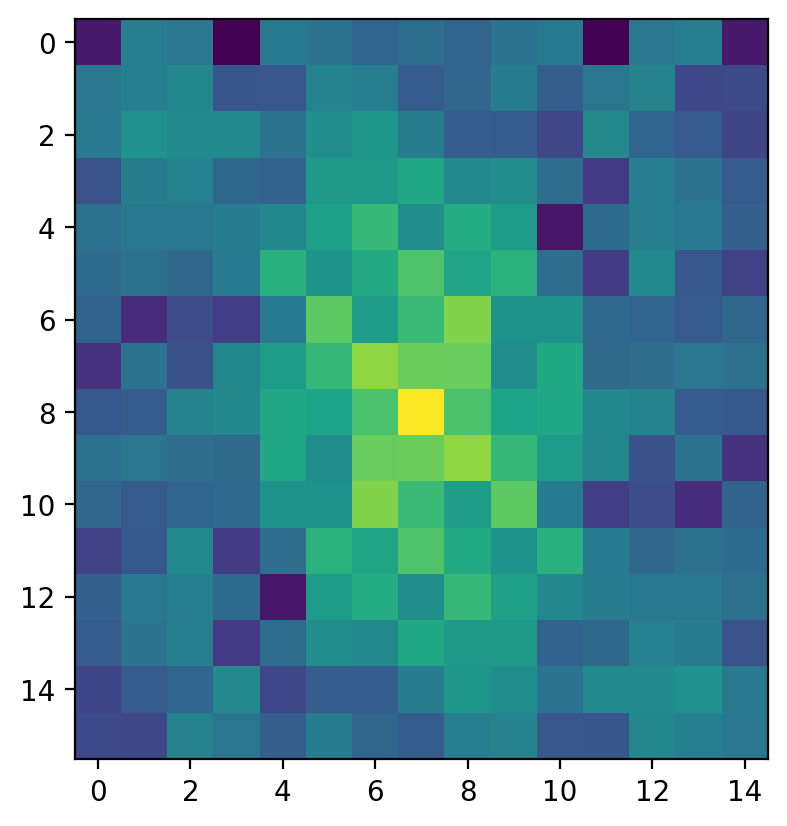

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
from torch import nn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from dataloader import FFT_transform_PM
from time import time
import os

In [2]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]

    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [3]:
#I'm using the dataloading code that you uploaded
entries = os.listdir('Data/')

#Importing training data
train_data=[k for k in entries if 'train' in k]

X_title_train=[]
flat_data_train=[]
flat_data_train_raw=[]
X_data_train = []
X_data_train_phase=[]
X_data_train_raw = []
flat_data_train_phase=[]
for entry in train_data:
    name=entry
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
            X_data_train_raw.append(mat_r)
            
            #here we apply the FFT transform
            mag_val,phase_val = FFT_transform_PM(mat_r)
            #break
            X_data_train.append(mag_val)
            X_data_train_phase.append(phase_val)
            X_title_train.append(name)
            flat_data_train.append(mag_val.flatten())
            flat_data_train_phase.append(phase_val.flatten())
            flat_data_train_raw.append(mat_r.flatten())
    #X_data_train.append(mag_val)
    #X_data.append (image)

#Importing test data
test_data=[k for k in entries if 'test' in k]
#print(test_data)

#test set
X_title_test=[]
X_data_test = []
flat_data_test=[]
X_data_test_phase=[]
X_data_test_raw=[]
flat_data_test_phase=[]
flat_data_test_raw=[]

#Validation set
X_title_val=[]
X_data_val = []
flat_data_val=[]
X_data_val_phase=[]
X_data_val_raw=[]
flat_data_val_phase=[]
flat_data_val_raw=[]

for entry in test_data:
    name=entry
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        counter = 0
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
            mag_val,phase_val = FFT_transform_PM(mat_r)
            
            if counter < 40:
                X_data_val_raw.append(mat_r)
                X_data_val.append(mag_val)
                X_data_val_phase.append(phase_val)
                X_title_val.append(name)
                flat_data_val.append(mag_val.flatten())
                flat_data_val_phase.append(phase_val.flatten())
                flat_data_val_raw.append(mat_r.flatten())
            else:
                X_data_test_raw.append(mat_r)
                X_data_test.append(mag_val)
                X_data_test_phase.append(phase_val)
                X_title_test.append(name)
                flat_data_test.append(mag_val.flatten())
                flat_data_test_phase.append(phase_val.flatten())
                flat_data_test_raw.append(mat_r.flatten())
            
            counter += 1

#             mag_val,phase_val = FFT_transform_PM(mat_r)
            #break
#             X_data_test.append(mag_val)
#             X_data_test_phase.append(phase_val)
#             X_title_test.append(name)
#             flat_data_test.append(mag_val.flatten())
#             flat_data_test_phase.append(phase_val.flatten())
#             flat_data_test_raw.append(mat_r.flatten())
    #X_data.append (image)

print("Data size metrics:")
print("Training set: ", )
print("        RAW: ", len(X_data_train_raw))
print("        Magnitude: ", len(X_data_train))
print("        Phase: ", len(X_data_train_phase))
print()
print("Validation set: ", )
print("        RAW: ", len(X_data_val_raw))
print("        Magnitude: ", len(X_data_val))
print("        Phase: ", len(X_data_val_phase))
print()
print("Testing set: ", )
print("        RAW: ", len(X_data_test_raw))
print("        Magnitude: ", len(X_data_test))
print("        Phase: ", len(X_data_test_phase))

#calculate the labels of the data
res_train=[]
res_train = [sub.replace('.txt', '') for sub in X_title_train]
res_train = [sub.replace('train_', '') for sub in res_train]
res_train = [eval(i) for i in res_train]
X_train_lable=res_train
res_val=[]
res_val = [sub.replace('.txt', '') for sub in X_title_val]
res_val = [sub.replace('test_', '') for sub in res_val]
res_val = [eval(i) for i in res_val]
X_val_lable=res_val
res_test=[]
res_test = [sub.replace('.txt', '') for sub in X_title_test]
res_test = [sub.replace('test_', '') for sub in res_test]
res_test = [eval(i) for i in res_test]
X_test_lable=res_test


x_train=flat_data_train
x_train_raw=flat_data_train_raw
x_train_phase= flat_data_train_phase # added the phase values 
#here I just convert nan to numbers but we might want to look deeper into where the nan values are coming from in the first place
x_train=np.nan_to_num(x_train)
x_train_raw=np.nan_to_num(x_train_raw)
x_train_phase = np.nan_to_num(x_train_phase)
#print(len(flat_data_train))
y_train_temp = X_train_lable
y_train = [float(temp_y) for temp_y in y_train_temp] #Converting to Float; for softmax at output (not mandatory)

x_val=flat_data_val
x_val_raw=flat_data_val_raw
x_val_phase = flat_data_val_phase
x_val=np.nan_to_num(x_val)
x_val_phase= np.nan_to_num(x_val_phase)
y_val_temp = X_val_lable
y_val = [float(temp_yy) for temp_yy in y_val_temp] #Converting to Float; for softmax at output (not mandatory)

x_test=flat_data_test
x_test_raw=flat_data_test_raw
x_test_phase = flat_data_test_phase
x_test=np.nan_to_num(x_test)
x_test_phase= np.nan_to_num(x_test_phase)
y_test_temp = X_test_lable
y_test = [float(temp_yy) for temp_yy in y_test_temp] #Converting to Float; for softmax at output (not mandatory)

#One hot encoding the class labels
enc = OneHotEncoder(handle_unknown='ignore')
enc_y_train = np.array(y_train)
enc_y_train = enc_y_train.reshape(-1, 1)

enc_y_val = np.array(y_val)
enc_y_val = enc_y_val.reshape(-1, 1)

enc_y_test = np.array(y_test)
enc_y_test = enc_y_test.reshape(-1, 1)

enc.fit(enc_y_train)
# print("Categories:", enc.categories_)
n_y_train = enc.transform(enc_y_train).toarray()
n_y_val = enc.transform(enc_y_val).toarray()
n_y_test = enc.transform(enc_y_test).toarray()

Data size metrics:
Training set: 
        RAW:  1000
        Magnitude:  1000
        Phase:  1000

Validation set: 
        RAW:  400
        Magnitude:  400
        Phase:  400

Testing set: 
        RAW:  600
        Magnitude:  600
        Phase:  600


In [4]:
# Layer details for the neural network
input_size = 240
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)     

Sequential(
  (0): Linear(in_features=240, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [5]:
criterion = nn.NLLLoss()
# images, labels = next(iter(trainloader))
# images = images.view(images.shape[0], -1)
batch_size = 100
batch_x, batch_y = next_batch(batch_size, x_train_raw, y_train)
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

logps = model(batch_x_tensor)
loss = criterion(logps, batch_y_tensor)

In [6]:
print(batch_x.shape)

(100, 240)


In [7]:
print(batch_y_tensor)

tensor([2, 3, 6, 4, 8, 7, 3, 9, 9, 1, 2, 0, 8, 4, 2, 2, 0, 0, 5, 1, 9, 0, 4, 2,
        9, 2, 8, 2, 5, 6, 0, 3, 3, 6, 6, 1, 8, 5, 3, 0, 4, 2, 9, 6, 5, 1, 3, 6,
        4, 9, 9, 2, 1, 8, 0, 1, 2, 7, 2, 5, 0, 2, 0, 6, 5, 7, 8, 9, 4, 5, 2, 7,
        1, 1, 9, 0, 1, 3, 6, 8, 8, 4, 0, 8, 9, 1, 6, 2, 3, 8, 0, 8, 8, 9, 8, 2,
        8, 7, 8, 5])


In [8]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-6.0285e-03, -7.0085e-03, -7.5997e-03,  ..., -7.2224e-04,
         -6.0932e-04, -5.8839e-04],
        [ 0.0000e+00, -6.1317e-04, -8.1757e-04,  ..., -2.6598e-03,
         -1.9737e-03, -1.0254e-03],
        [ 1.1361e-03,  2.1440e-03,  5.2336e-03,  ...,  8.9133e-04,
          1.1360e-03, -8.8781e-04],
        ...,
        [-3.9385e-03, -5.2988e-03, -4.9684e-03,  ...,  5.9579e-03,
          6.3296e-03,  2.7819e-03],
        [ 3.9107e-03, -1.4851e-03, -5.4616e-03,  ...,  3.0262e-04,
          2.1300e-03,  2.2747e-03],
        [ 4.7498e-03,  2.3840e-03,  1.1959e-03,  ..., -7.1048e-05,
         -1.1903e-03, -7.7964e-04]])


In [9]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.5)

# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
# >>> for epoch in range(10):
# >>>     train(...)
# >>>     val_loss = validate(...)
# >>>     # Note that step should be called after validate()
# >>>     scheduler.step(val_loss)

In [10]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [11]:
print('Initial weights - ', model[0].weight)

# images, labels = next(iter(trainloader))
# images.resize_(64, 784)
batch_x, batch_y = next_batch(batch_size, x_train_raw, y_train)
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(batch_x_tensor)
loss = criterion(output, batch_y_tensor)
loss.backward()
print('Gradient -', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[-0.0044,  0.0222, -0.0393,  ...,  0.0214,  0.0606,  0.0101],
        [-0.0326,  0.0326, -0.0222,  ...,  0.0241, -0.0637, -0.0253],
        [-0.0548, -0.0609, -0.0504,  ...,  0.0468, -0.0369, -0.0383],
        ...,
        [-0.0460,  0.0168,  0.0095,  ...,  0.0426, -0.0408, -0.0485],
        [ 0.0010,  0.0378, -0.0190,  ..., -0.0582, -0.0529, -0.0059],
        [-0.0273,  0.0634,  0.0603,  ...,  0.0594,  0.0366,  0.0020]],
       requires_grad=True)
Gradient - tensor([[-0.0023, -0.0026, -0.0023,  ..., -0.0042, -0.0034, -0.0011],
        [-0.0014, -0.0029, -0.0029,  ..., -0.0024, -0.0014, -0.0009],
        [ 0.0044,  0.0080,  0.0094,  ...,  0.0035,  0.0022,  0.0009],
        ...,
        [ 0.0012,  0.0037,  0.0031,  ...,  0.0050,  0.0050,  0.0023],
        [ 0.0003,  0.0026,  0.0014,  ..., -0.0014,  0.0009,  0.0014],
        [-0.0023, -0.0008, -0.0030,  ..., -0.0029, -0.0033, -0.0008]])


In [12]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0041,  0.0225, -0.0391,  ...,  0.0218,  0.0610,  0.0102],
        [-0.0324,  0.0329, -0.0219,  ...,  0.0243, -0.0635, -0.0252],
        [-0.0552, -0.0617, -0.0514,  ...,  0.0465, -0.0371, -0.0384],
        ...,
        [-0.0462,  0.0165,  0.0091,  ...,  0.0421, -0.0413, -0.0487],
        [ 0.0010,  0.0376, -0.0191,  ..., -0.0581, -0.0530, -0.0060],
        [-0.0271,  0.0635,  0.0606,  ...,  0.0597,  0.0369,  0.0021]],
       requires_grad=True)


In [13]:
from pytorchtools import EarlyStopping

patience = 20

# to track the training loss as the model trains
train_losses = []
# to track the validation loss as the model trains
valid_losses = []
# to track the average training loss per epoch as the model trains
avg_train_losses = []
# to track the average validation loss per epoch as the model trains
avg_valid_losses = [] 

# initialize the early_stopping object
early_stopping = EarlyStopping(patience=patience, verbose=True)

In [14]:
# optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 160
for e in range(epochs):
    running_loss = 0
#     for images, labels in trainloader:
#         # Flatten MNIST images into a 784 long vector
#         images = images.view(images.shape[0], -1)
    
    batch_x, batch_y = next_batch(batch_size, x_train_raw, y_train)
    batch_x_tensor = torch.from_numpy(batch_x)
    batch_x_tensor = batch_x_tensor.to(torch.float32)

    batch_y_tensor = torch.from_numpy(batch_y)
    batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

    # Training pass
    optimizer.zero_grad()

    output = model(batch_x_tensor)
    loss = criterion(output, batch_y_tensor)

    #This is where the model learns by backpropagating
    loss.backward()

    #And optimizes its weights here
    optimizer.step()
    running_loss += loss.item()
    
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(batch_x_tensor)))
    avg_train_losses.append(running_loss/len(batch_x_tensor))
    
    valid_loss = 0
    batch_x, batch_y = next_batch(batch_size, x_val_raw, y_val)
    batch_x_tensor = torch.from_numpy(batch_x)
    batch_x_tensor = batch_x_tensor.to(torch.float32)

    batch_y_tensor = torch.from_numpy(batch_y)
    batch_y_tensor = batch_y_tensor.type(torch.LongTensor)
    
    target = model(batch_x_tensor)
    loss = criterion(target,batch_y_tensor)
    
    valid_loss += loss.item()
    scheduler.step(valid_loss)
        
    # early_stopping needs the validation loss to check if it has decresed, 
    # and if it has, it will make a checkpoint of the current model
    early_stopping(valid_loss, model)

    if early_stopping.early_stop:
        print("Early stopping")
        break

#     else:
    print("Validation loss: {}".format(valid_loss/len(batch_x_tensor)))
    avg_valid_losses.append(valid_loss/len(batch_x_tensor))
    print("Learning rate: ", get_lr(optimizer))
print("\nTraining Time (in minutes) =",(time()-time0)/60)
# load the last checkpoint with the best model
model.load_state_dict(torch.load('checkpoint.pt'))

Epoch 0 - Training loss: 0.0220882511138916
Validation loss decreased (inf --> 2.073682).  Saving model ...
Validation loss: 0.020736818313598634
Learning rate:  0.1
Epoch 1 - Training loss: 0.020127363204956054
Validation loss decreased (2.073682 --> 1.767171).  Saving model ...
Validation loss: 0.01767171025276184
Learning rate:  0.1
Epoch 2 - Training loss: 0.017412896156311034
Validation loss decreased (1.767171 --> 1.582572).  Saving model ...
Validation loss: 0.015825724601745604
Learning rate:  0.1
Epoch 3 - Training loss: 0.015558892488479614
Validation loss decreased (1.582572 --> 1.266591).  Saving model ...
Validation loss: 0.012665910720825195
Learning rate:  0.1
Epoch 4 - Training loss: 0.01236293077468872
EarlyStopping counter: 1 out of 20
Validation loss: 0.013260948657989501
Learning rate:  0.1
Epoch 5 - Training loss: 0.013744772672653198
EarlyStopping counter: 2 out of 20
Validation loss: 0.02563102960586548
Learning rate:  0.1
Epoch 6 - Training loss: 0.0251156163215

<All keys matched successfully>

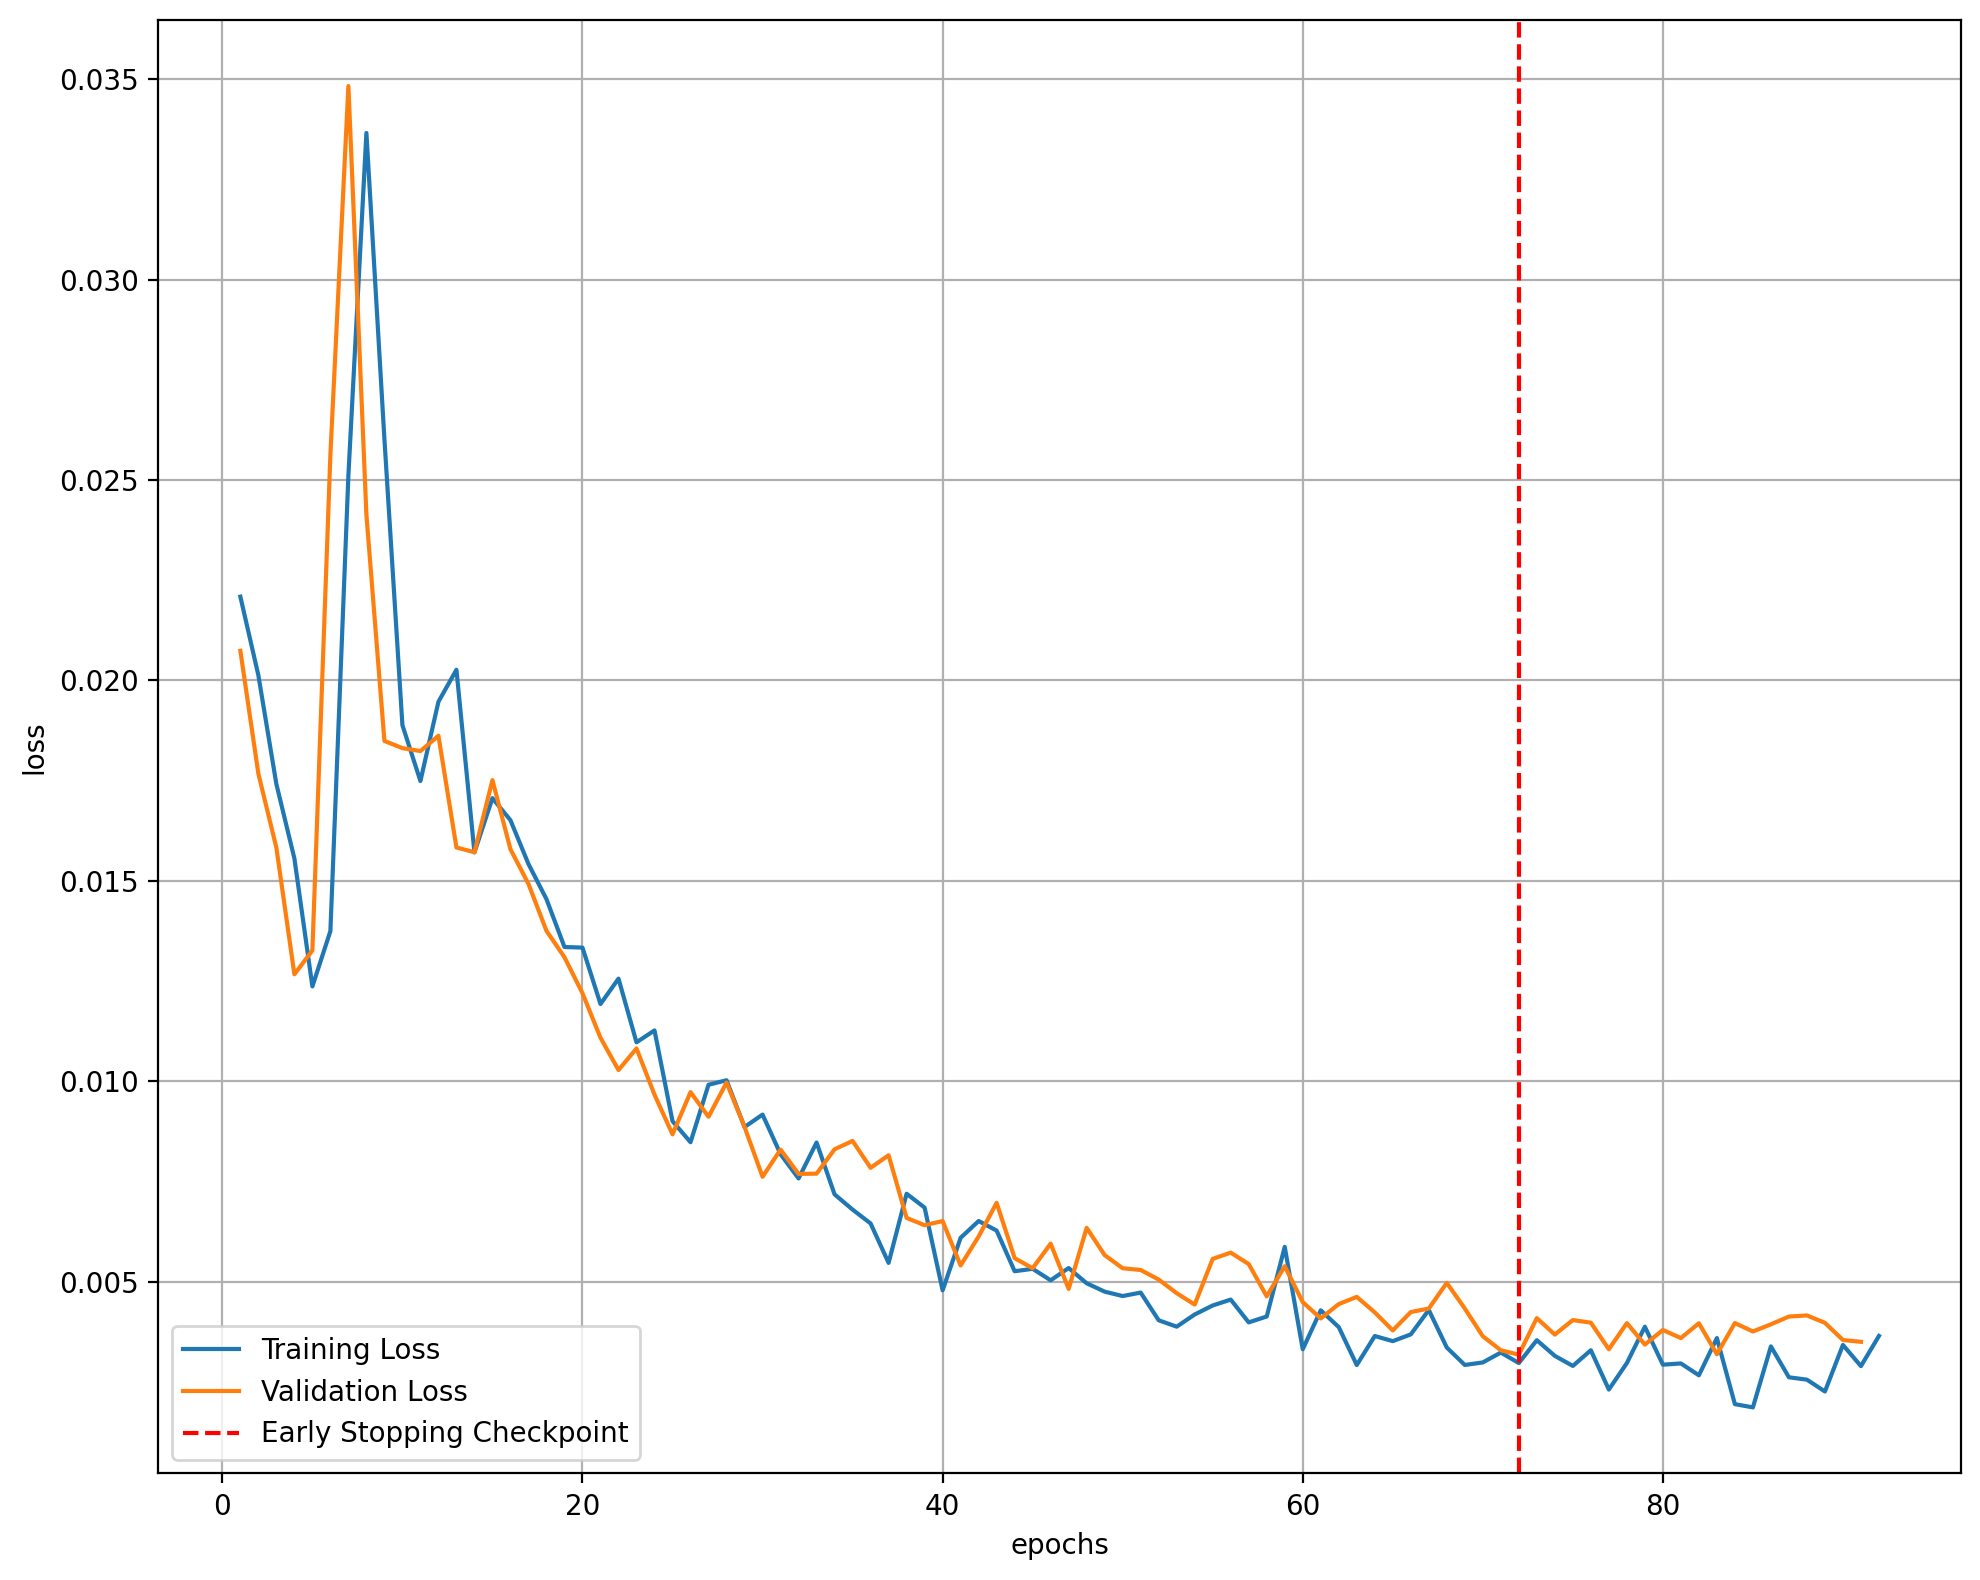

In [15]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(avg_train_losses)+1),avg_train_losses, label='Training Loss')
plt.plot(range(1,len(avg_valid_losses)+1),avg_valid_losses,label='Validation Loss')

# find position of lowest validation loss
minposs = avg_valid_losses.index(min(avg_valid_losses))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
# plt.ylim(0, 0.5) # consistent scale
# plt.xlim(0, len(avg_train_losses)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [16]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 16, 15).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Actual label = 7.0
Predicted Digit = 7


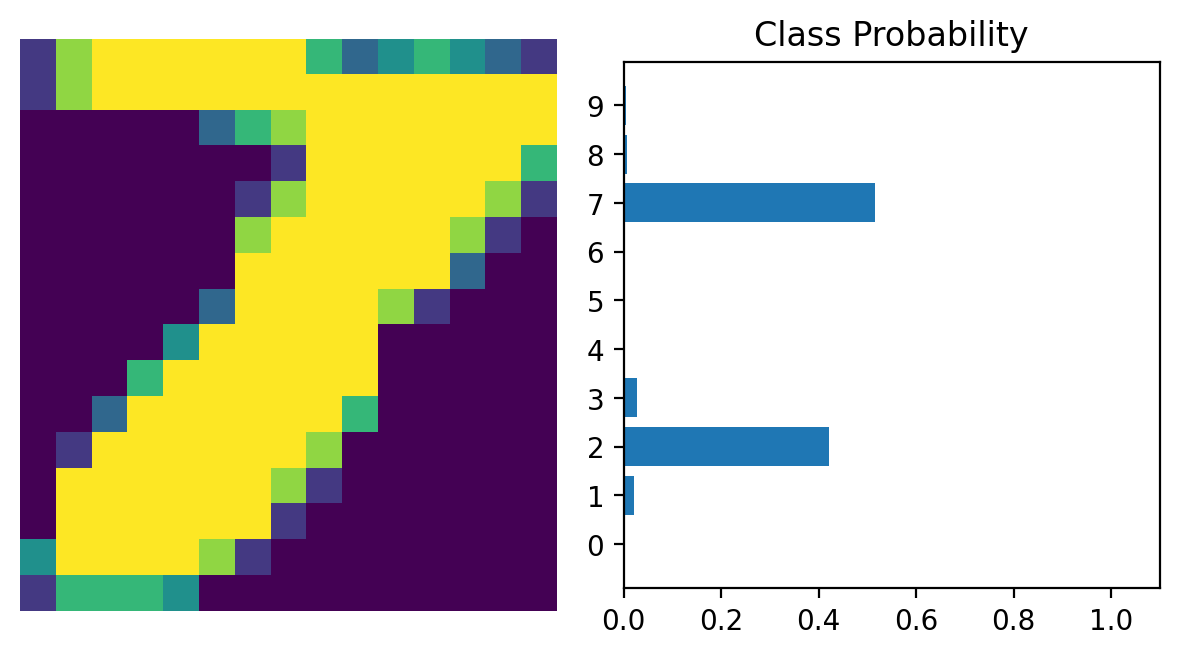

In [17]:
batch_x, batch_y = next_batch(batch_size, x_test_raw, y_test)
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# img = images[0].view(1, 784)
img = batch_x_tensor[0].view(1,240)
label = batch_y[0]
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Actual label =", label)
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 16, 15), ps)

In [18]:
batch_x, batch_y = next_batch(batch_size, x_test_raw, y_test)
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(batch_x_tensor)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy())

In [19]:
probability_arr = []
for i in range(len(probab)):
    temp_arr = list(probab[i])
    probability_arr.append(temp_arr.index(max(temp_arr)))
# probab.index(max(probab))

In [20]:
probability_arr

[1,
 1,
 8,
 7,
 6,
 1,
 1,
 3,
 4,
 6,
 2,
 4,
 0,
 9,
 7,
 4,
 7,
 8,
 7,
 9,
 8,
 8,
 4,
 1,
 5,
 3,
 8,
 1,
 9,
 0,
 2,
 5,
 1,
 3,
 1,
 9,
 9,
 7,
 4,
 3,
 2,
 0,
 3,
 8,
 1,
 6,
 5,
 6,
 6,
 3,
 8,
 3,
 5,
 2,
 1,
 8,
 9,
 2,
 2,
 8,
 2,
 5,
 2,
 5,
 7,
 3,
 4,
 4,
 5,
 5,
 1,
 7,
 2,
 1,
 3,
 6,
 3,
 9,
 6,
 5,
 4,
 6,
 6,
 3,
 7,
 4,
 4,
 2,
 3,
 7,
 1,
 1,
 0,
 1,
 5,
 5,
 0,
 6,
 1,
 6]

In [21]:
len(probability_arr)

100

In [22]:
batch_y_tensor

tensor([1, 1, 8, 7, 6, 1, 1, 3, 4, 6, 2, 4, 0, 9, 7, 4, 7, 8, 7, 7, 8, 8, 4, 1,
        5, 3, 8, 1, 9, 0, 2, 5, 1, 3, 1, 9, 9, 7, 4, 3, 2, 0, 3, 8, 1, 6, 5, 6,
        6, 3, 8, 3, 5, 2, 1, 8, 9, 2, 2, 8, 2, 5, 2, 5, 7, 3, 4, 4, 5, 5, 1, 7,
        2, 1, 3, 6, 3, 9, 6, 5, 4, 6, 6, 3, 7, 4, 4, 2, 3, 9, 1, 1, 0, 1, 5, 5,
        0, 6, 1, 6])

In [23]:
len(batch_y_tensor)

100

In [24]:
acc = sum(1 for x,y in zip(probability_arr,batch_y_tensor) if x == y) / len(probability_arr)
print("Accuracy = ", acc*100,"%")

Accuracy =  98.0 %


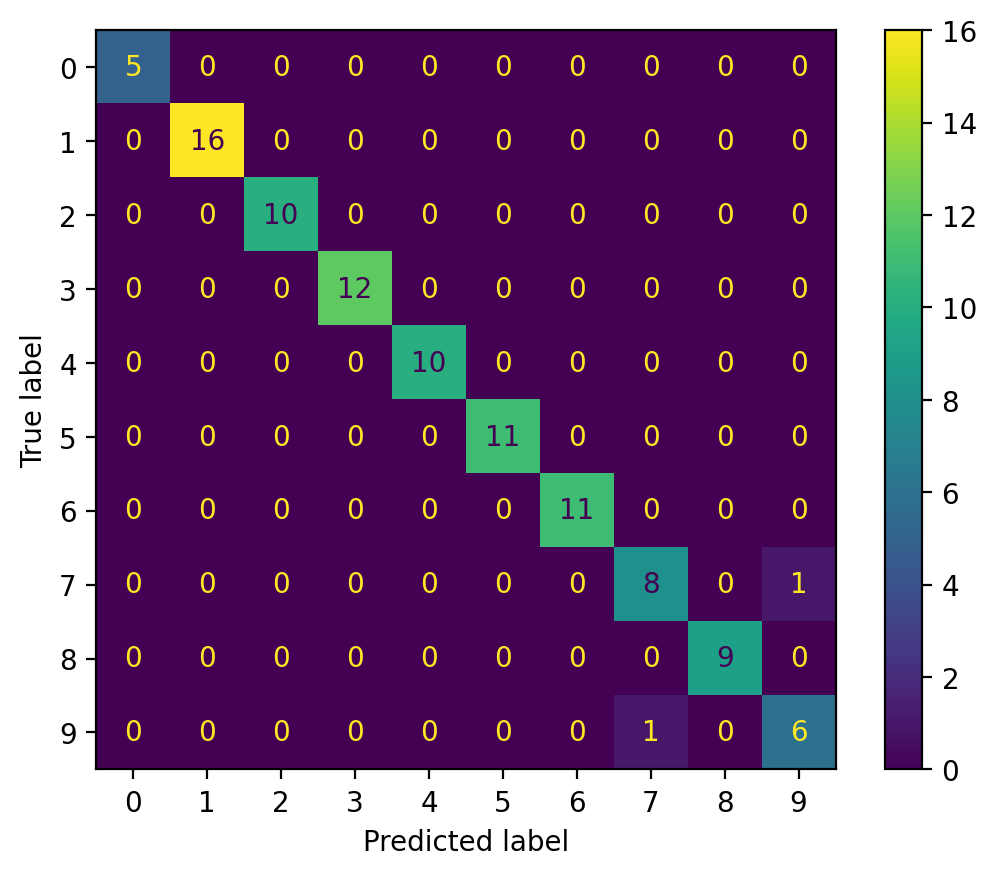

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = batch_y_tensor
y_pred = probability_arr

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()